In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [4]:
# pre-built and pre-trained deep learning VGG16 model
base_model=VGG16(weights='imagenet',include_top=True)
base_model.summary()
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)
# extract features from one block
model=Model(input=base_model.input,
           output=base_model.get_layer('block4_pool').output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/Users/hupidong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [14]:
img_path="../data/images/cat.jpg"
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
print("shape before expand_dims:",x.shape)
x=np.expand_dims(x,axis=0)
print("shape after expand_dims:",x.shape)
x=preprocess_input(x)
# get the features from the block
features=model.predict(x)

shape before expand_dims: (224, 224, 3)
shape after expand_dims: (1, 224, 224, 3)



In [16]:
features.shape

(1, 14, 14, 512)

In [17]:
import matplotlib.pyplot as plt

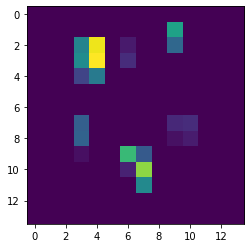

In [21]:
plt.imshow(features[0,:,:,3])